In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
! wget "https://raw.githubusercontent.com/AI4Finance-Foundation/FinRL/refs/heads/master/requirements.txt"
! sudo apt-get install swig
! pip install box2d-py
! pip install -r requirements.txt
! pip install finrl yfinance stable_baselines3

--2025-02-05 19:24:52--  https://raw.githubusercontent.com/AI4Finance-Foundation/FinRL/refs/heads/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     729  --.-KB/s    in 0s      

2025-02-05 19:24:53 (31.5 MB/s) - ‘requirements.txt’ saved [729/729]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 62 not upgraded.
Need to get 1,116 kB of archives.
After 

In [4]:
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader

ticker = "GOOGL"
benchmark_ticker = "^GSPC" # S&P 500
start_date = "2015-01-01"
end_date = "2025-01-01"

df_stock = YahooDownloader(start_date=start_date, end_date=end_date, ticker_list=[ticker]).fetch_data()
df_benchmark = YahooDownloader(start_date=start_date, end_date=end_date, ticker_list=[benchmark_ticker]).fetch_data()

df = pd.merge(df_stock, df_benchmark[['date', 'close']], on='date', suffixes=('', '_benchmark'))

df

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (2516, 8)


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (2516, 8)


,date,open,high,low,close,volume,tic,day,close_benchmark
0,2015-01-02,26.381865,26.477501,26.790001,26.629999,26480000,GOOGL,4,2058.899902
1,2015-01-05,25.879185,25.973000,26.399500,26.357500,41182000,GOOGL,0,2054.439941
2,2015-01-06,25.240501,25.332001,26.060499,26.025000,54456000,GOOGL,1,2022.150024
3,2015-01-07,25.166271,25.257500,25.574499,25.547501,46918000,GOOGL,2,2005.550049
4,2015-01-08,25.253954,25.345501,25.375000,25.075500,73054000,GOOGL,3,2030.609985
...,...,...,...,...,...,...,...,...,...
2511,2024-12-24,196.110001,196.110001,196.110001,194.839996,10403300,GOOGL,1,5984.629883
2512,2024-12-26,195.600006,195.600006,196.750000,195.149994,12046600,GOOGL,3,6024.970215
2513,2024-12-27,192.759995,192.759995,195.320007,194.949997,18891400,GOOGL,4,6006.169922
2514,2024-12-30,191.240005,191.240005,192.550003,189.800003,14264700,GOOGL,0,5920.669922


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

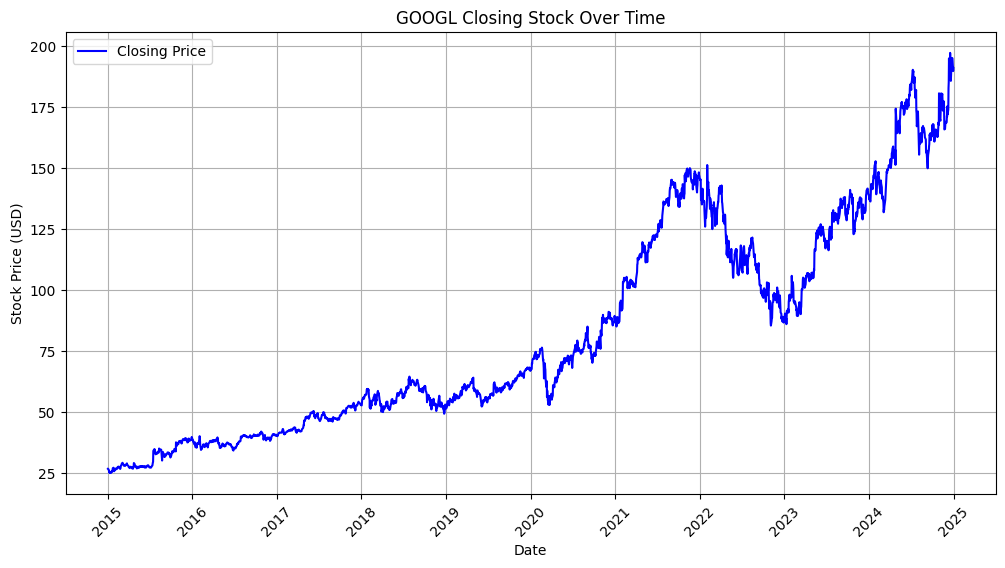

In [5]:
# Plot stock closing price over time
%matplotlib inline
plt.figure(figsize=(12, 6))
sns.lineplot(x=pd.to_datetime(df['date']), y=df["close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{ticker} Closing Stock Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

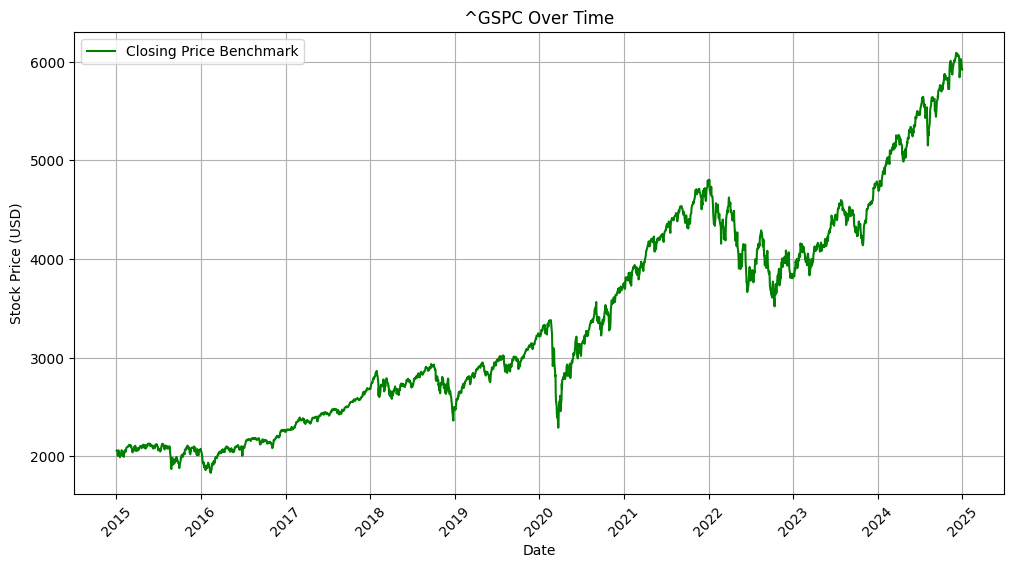

In [6]:
# Plot benchmark data over time
%matplotlib inline
plt.figure(figsize=(12, 6))
sns.lineplot(x=pd.to_datetime(df['date']), y=df["close_benchmark"], label="Closing Price Benchmark", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{benchmark_ticker} Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [7]:
from finrl.config import INDICATORS
from finrl.meta.preprocessor.preprocessors import FeatureEngineer

fe = FeatureEngineer(
    use_technical_indicator=True, 
    tech_indicator_list=INDICATORS,
    use_turbulence=True
)
df = fe.preprocess_data(df)

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Successfully added technical indicators
Successfully added turbulence index


,date,open,high,low,close,volume,tic,day,close_benchmark,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,2015-01-02,26.381865,26.477501,26.790001,26.629999,26480000,GOOGL,4,2058.899902,0.000000,26.879122,26.108378,0.000000,-66.666667,100.000000,26.629999,26.629999,0.000000
1,2015-01-05,25.879185,25.973000,26.399500,26.357500,41182000,GOOGL,0,2054.439941,-0.006114,26.879122,26.108378,0.000000,-66.666667,100.000000,26.493750,26.493750,0.000000
2,2015-01-06,25.240501,25.332001,26.060499,26.025000,54456000,GOOGL,1,2022.150024,-0.018101,26.943490,25.731509,0.000000,-100.000000,100.000000,26.337500,26.337500,0.000000
3,2015-01-07,25.166271,25.257500,25.574499,25.547501,46918000,GOOGL,2,2005.550049,-0.040349,27.072156,25.207844,0.000000,-95.317939,100.000000,26.140000,26.140000,0.000000
4,2015-01-08,25.253954,25.345501,25.375000,25.075500,73054000,GOOGL,3,2030.609985,-0.070371,27.175384,24.678816,0.000000,-92.239824,100.000000,25.927100,25.927100,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-12-24,196.110001,196.110001,196.110001,194.839996,10403300,GOOGL,1,5984.629883,5.806758,204.312874,159.914126,60.466405,111.505752,27.764547,179.496000,173.663333,0.263003
2512,2024-12-26,195.600006,195.600006,196.750000,195.149994,12046600,GOOGL,3,6024.970215,5.880267,205.317387,161.661613,60.605580,102.493853,27.764547,180.007000,174.120999,0.000033
2513,2024-12-27,192.759995,192.759995,195.320007,194.949997,18891400,GOOGL,4,6006.169922,5.854894,206.066574,163.507425,60.463519,84.752061,25.332129,180.489999,174.596499,0.016076
2514,2024-12-30,191.240005,191.240005,192.550003,189.800003,14264700,GOOGL,0,5920.669922,5.357467,205.789141,165.914858,56.910013,59.797508,20.726383,180.874000,175.019666,2.020196


In [75]:
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from stable_baselines3.common.logger import Logger, KVWriter, CSVOutputFormat
from gymnasium import spaces

class CustomStockTradingEnv(StockTradingEnv):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.logger = Logger('results',[CSVOutputFormat])
        self.reward_function = None

        # action space for equal distribution of BUY/SELL and HOLD
        action_dim = 1 + kwargs["action_space"]
        print("Action Space =", action_dim)
        self.action_space = spaces.Box(low=-1, high=1, shape=(action_dim,), dtype=float)

    def set_reward_function(self, reward_function):
        self.reward_function = reward_function

    def step(self, actions):
        hold = actions[0]
        purchase = actions[1:]
        if hold < 0:
            purchase[:] = 0

        # step
        next_state, reward, terminal, truncated, info = super().step(purchase)

        # custom reward function
        if self.reward_function is not None:
            reward = self.reward_function(self, actions, next_state, reward, terminal, truncated, info)
        
        return next_state, reward, terminal, truncated, info

print("Loaded class CustomStockTradingEnv")

Loaded class CustomStockTradingEnv


In [100]:
reward_logging = False  # set to True to print values
overall_reward = 0  # set to 0 to get total accumulated reward

def sample_custom_reward(self, actions, next_state, base_reward, terminal, truncated, info):
    import numpy as np
    import pandas as pd
    
    # Convert memory to DataFrame
    df_total_value = pd.DataFrame(self.asset_memory, columns=["account_value"])
    df_total_value["date"] = self.date_memory
    df_total_value["daily_return"] = df_total_value["account_value"].pct_change(1)
    
    # Get benchmark values from the 'close_benchmark' column, but only for rows up to the length of asset_memory
    df_total_value["benchmark_value"] = self.df["close_benchmark"].iloc[:len(df_total_value)].reset_index(drop=True)
    df_total_value["benchmark_daily_return"] = df_total_value["benchmark_value"].pct_change(1)
    
    # Remove NaN values
    remove_nan = lambda x: 0 if np.isnan(x) else x
    
    # Calculate portfolio returns and risks
    mean_returns = df_total_value["daily_return"].mean()
    std_returns = df_total_value["daily_return"].std()
    
    # Calculate benchmark returns and risks
    bench_returns = df_total_value["benchmark_daily_return"].mean()
    bench_std = df_total_value["benchmark_daily_return"].std()
    
    # Calculate beta
    beta = 1.0  # default value
    if bench_std and not np.isnan(bench_std) and bench_std != 0:
        portfolio_returns = df_total_value["daily_return"].fillna(0)
        benchmark_returns = df_total_value["benchmark_daily_return"].fillna(0)
        if len(portfolio_returns) == len(benchmark_returns):
            covariance = np.cov(portfolio_returns, benchmark_returns)[0][1]
            beta = covariance / (bench_std ** 2)
    
    # Compute Sharpe Ratio
    sharpe = 0
    if std_returns and not np.isnan(std_returns):
        sharpe = (252**0.5) * mean_returns / std_returns
    
    # Compute Sortino Ratio
    downside_returns = df_total_value["daily_return"][df_total_value["daily_return"] < 0]
    downside_std = downside_returns.std(ddof=1)
    
    sortino = 0
    if downside_std and not np.isnan(downside_std):
        sortino = (252**0.5) * mean_returns / downside_std
    
    # Compute Treynor Ratio
    treynor = 0
    if beta and not np.isnan(beta) and beta != 0:
        treynor = (252**0.5) * mean_returns / beta
    
    # Compute Differential Return
    diff_return = 0
    if beta and not np.isnan(beta) and beta != 0:
        diff_return = (mean_returns - bench_returns) / beta
    
    if reward_logging:
        print(f"Mean Daily Returns: {mean_returns}")
        print(f"Benchmark Returns: {bench_returns}")
        print(f"Daily Return Standard Deviation: {std_returns}")
        print(f"Downside Only Standard Deviation: {downside_std}")
        print(f"Beta: {beta}")
        print(f"Sharpe Ratio: {sharpe}")
        print(f"Sortino Ratio: {sortino}")
        print(f"Treynor Ratio: {treynor}")
        print(f"Differential Return: {diff_return}")
    
    # Compute final reward with all components
    total_reward = remove_nan(sortino)
    if total_reward == 0: total_reward = -100 # drive towards transactions
    
    if reward_logging:
        print(f"Reward: {total_reward}")
        print("-----------------------------")
    
    global overall_reward
    overall_reward += total_reward
    
    return total_reward

print("Loaded custom reward function")

Loaded custom reward function


In [101]:
indicators = ["volume",	"macd", "boll_ub", "boll_lb", "rsi_30", "cci_30", "dx_30", "close_30_sma", "close_60_sma", "turbulence"]
turbulence_thresold=100

stock_dim = len(df["tic"].unique())
max_price = df['close'].max()
initial_amount = 10000
hmax = int(initial_amount / max_price)

env = CustomStockTradingEnv(
    df=df, 
    stock_dim=stock_dim, 
    hmax=hmax,
    initial_amount=initial_amount, 
    num_stock_shares=[0],

    # Verbose
    make_plots=True,
    print_verbosity=1,

    # Transaction Cost
    buy_cost_pct=[0.1],
    sell_cost_pct=[0.1],

    # Turbulence Thresold
    turbulence_threshold=turbulence_thresold,
    
    reward_scaling=1e-4,
    tech_indicator_list=indicators,

    # State Space: Portfolio Value + Holdings + Tech Indicators
    state_space= 1 + 2 * stock_dim  + len(indicators) * stock_dim,

    # Action Space
    action_space=stock_dim,
)

env.set_reward_function(sample_custom_reward) # load reward function
os.makedirs("results", exist_ok=True) # set up plots

env

Action Space = 2


In [102]:
# Testing the enviroment and set custom reward function
env.reset()
reward_logging = True

env.step(np.array([5, 1]))
env.step(np.array([-5, -1]))
env.step(np.array([0, -1]))
env.step(np.array([0, -1]))
env.step(np.array([0, -1]))
reward_logging = False

Mean Daily Returns: -0.014677495002746621
Benchmark Returns: -0.002166186385468727
Daily Return Standard Deviation: nan
Downside Only Standard Deviation: nan
Beta: 1.0
Sharpe Ratio: 0
Sortino Ratio: 0
Treynor Ratio: -0.2329980098799651
Differential Return: -0.012511308617277894
Reward: -100
-----------------------------
Mean Daily Returns: -0.008182381073318867
Benchmark Returns: -0.00894166241673544
Daily Return Standard Deviation: 0.009185478208155136
Downside Only Standard Deviation: 0.009185478208155136
Beta: -0.2136866570405193
Sharpe Ratio: -14.140937441761023
Sortino Ratio: -14.140937441761023
Treynor Ratio: 0.6078586024655293
Differential Return: -0.0035532463932579487
Reward: -14.140937441761023
-----------------------------
Mean Daily Returns: -0.009864472719773717
Benchmark Returns: -0.008697465683805842
Daily Return Standard Deviation: 0.007118623594309928
Downside Only Standard Deviation: 0.007118623594309928
Beta: -0.18901348632446335
Sharpe Ratio: -21.99774264128559
Sort

In [103]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import warnings
warnings.filterwarnings("ignore")

env.reset()
vec_env = make_vec_env(lambda: Monitor(env, '/'), n_envs=1)

model = PPO("MlpPolicy", vec_env, verbose=1, device=device)
model.learn(total_timesteps=100_000) 

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 158  |
|    iterations      | 1    |
|    time_elapsed    | 12   |
|    total_timesteps | 2048 |
-----------------------------
day: 2515, episode: 3
begin_total_asset: 10000.00
end_total_asset: 35.40
total_reward: -9964.60
total_cost: 10818.86
total_trades: 662
Sharpe: -2.734
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.52e+03     |
|    ep_rew_mean          | -8.74e+03    |
| time/                   |              |
|    fps                  | 147          |
|    iterations           | 2            |
|    time_elapsed         | 27           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0047385595 |
|    clip_fraction        | 0.0331       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.83        |
|    explained_varian

In [104]:
logs = pd.read_csv("/monitor.csv", skiprows=1)
logs.columns = ["reward", "episode_length", "timesteps"]
logs["reward_smooth"] = logs["reward"].rolling(window=10).mean()

logs

,reward,episode_length,timesteps,reward_smooth
0,-8735.722260,2516,17.678719,NaN
1,-7886.718618,2516,35.933383,NaN
2,-8195.717259,2516,53.246542,NaN
3,-8805.229730,2516,71.510835,NaN
4,-9612.437617,2516,91.276694,NaN
5,-8925.327973,2516,108.845756,NaN
6,-8290.666504,2516,126.406904,NaN
7,-8195.884711,2516,144.071831,NaN
8,-7566.914141,2516,163.797615,NaN
9,-8575.092986,2516,182.089465,-8478.971180


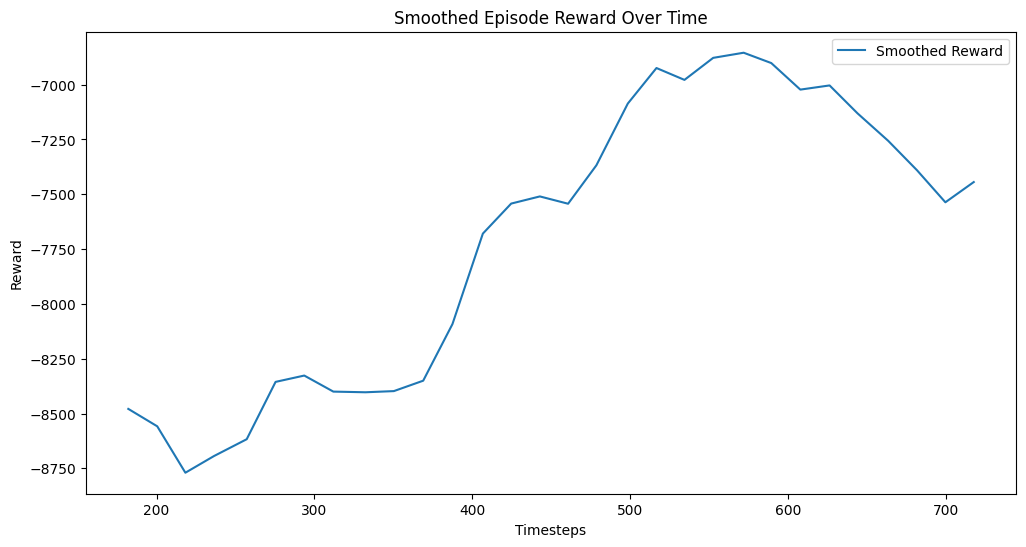

In [105]:
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.plot(logs["timesteps"], logs["reward_smooth"], label="Smoothed Reward")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("Smoothed Episode Reward Over Time")
plt.legend()
plt.show()

In [108]:
obs = vec_env.reset()
vec_env.envs[0].unwrapped.episode = 0 # Prints episode info
overall_reward = 0 # Keep track of accumulated overall reward

portfolio_values = []
timesteps = []

i = 0
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, done, info = vec_env.step(action)

    if done[0]:
        break

    portfolio_value = vec_env.envs[0].unwrapped.asset_memory[-1]
    portfolio_values.append(portfolio_value)
    timesteps.append(i)
    i += 1

day: 2515, episode: 0
begin_total_asset: 10000.00
end_total_asset: 67071.63
total_reward: 57071.63
total_cost: 908.86
total_trades: 2515
Sharpe: 0.810


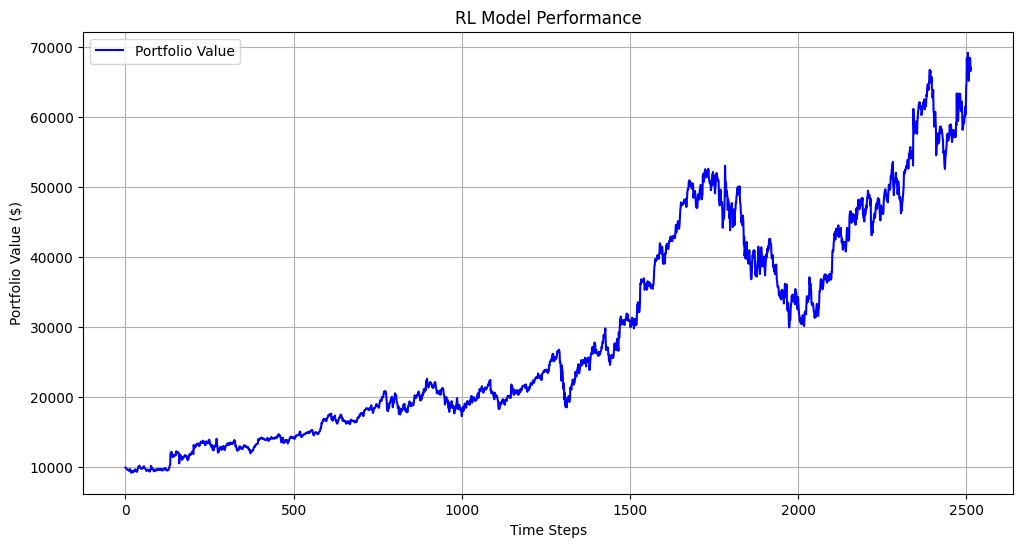

In [109]:
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.plot(timesteps, portfolio_values, label="Portfolio Value", color='blue')
plt.xlabel("Time Steps")
plt.ylabel("Portfolio Value ($)")
plt.title("RL Model Performance")
plt.legend()
plt.grid()
plt.show()

In [18]:
model.save(input())